In [9]:
using Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Plots")
using Plots
using DifferentialEquations

   Resolving package versions...
  No Changes to `C:\Users\Noark\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Noark\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
   Installed JpegTurbo_jll ──────────────── v2.1.91+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed GR_jll ─────────────────────── v0.72.7+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed LoggingExtras ──────────────── v1.0.0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed Measures ───────────────────── v0.3.2
   Installed ConcurrentUtilities ────────── v2.2.0
   Installed RelocatableFolders ─────────── v1.0.0
   Installed Unitful ────────────────────── v1.14.0
   Installed Contour ────────────────────── v0.6.2
   Installed Grisu ──────────────────────── v1.0.2
   Ins

Precompiling project...
  ✓ Pipe
  ✓ LaTeXStrings
  ✓ TensorCore
  ✓ Contour
  ✓ ConcurrentUtilities
  ✓ Measures
  ✓ SimpleBufferStream
  ✓ Unzip
  ✓ URIs
  ✓ Grisu
  ✓ Formatting
  ✓ BitFlags
  ✓ DelimitedFiles
  ✓ Scratch
  ✓ LoggingExtras
  ✓ TranscodingStreams
  ✓ UnicodeFun
  ✓ OpenSSL_jll
  ✓ Graphite2_jll
  ✓ Libmount_jll
  ✓ Bzip2_jll
  ✓ Xorg_libXau_jll
  ✓ libpng_jll
  ✓ libfdk_aac_jll
  ✓ LAME_jll
  ✓ Pixman_jll
  ✓ LERC_jll
  ✓ fzf_jll
  ✓ JpegTurbo_jll
  ✓ FixedPointNumbers
  ✓ Ogg_jll
  ✓ Xorg_libXdmcp_jll
  ✓ x265_jll
  ✓ x264_jll
  ✓ libaom_jll
  ✓ Zstd_jll
  ✓ Expat_jll
  ✓ LZO_jll
  ✓ Opus_jll
  ✓ Xorg_xtrans_jll
  ✓ Libiconv_jll
  ✓ Libffi_jll
  ✓ Libgpg_error_jll
  ✓ Wayland_protocols_jll
  ✓ Xorg_libpthread_stubs_jll
  ✓ Libuuid_jll
  ✓ FriBidi_jll
  ✓ Showoff
  ✓ RelocatableFolders
  ✓ CodecZlib
  ✓ FreeType2_jll
  ✓ JLFzf
  ✓ libvorbis_jll
  ✓ OpenSSL
  ✓ Latexify
  ✓ Libtiff_jll
  ✓ XML2_jll
  ✓ ColorTypes
  ✓ Libgcrypt_jll
  ✓ Fontconfig_jll
  ✓ Gettext_jll
  

### Zadanie 3

In [62]:
a = 0.9
b = 0.9
c = 0.5
d = 0.1

0.1

In [44]:
x0 = 10.0
y0 = 10.0
t0 = 0.0
tn = 60.0

60.0

In [38]:
h = 0.01
n = (tn - t0) / h
ts = t0:h:tn

0.0:0.01:60.0

In [39]:
function DoubleEuler(x0, y0, t0, n, h, ts)
    xk = x0
    yk = y0
    
    xs = [xk]
    ys = [yk]
    for k in 1:n
        xk1 = xk + (-a * xk + c * d * xk * yk) * h
        yk1 = yk + (b * yk - d * xk * yk) * h
        xk = xk1
        yk = yk1
        push!(xs, xk)
        push!(ys, yk)
    end
    return (xs, ys)
end

DoubleEuler (generic function with 1 method)

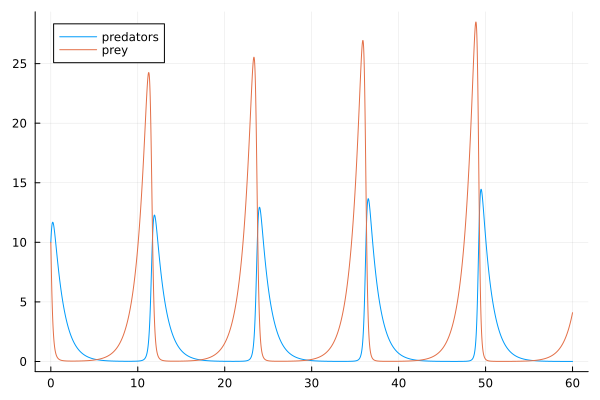

In [40]:
(xs, ys) = DoubleEuler(x0, y0, t0, n, h, ts)
plot(ts, xs, label="predators")
plot!(ts, ys, label="prey")

In [45]:
function PredPrey(dxy, xy, p, t)
    dxy[1] = -a * xy[1] + c * d * xy[1] * xy[2]
    dxy[2] = b * xy[2] - d * xy[1] * xy[2]
end

PredPrey (generic function with 1 method)

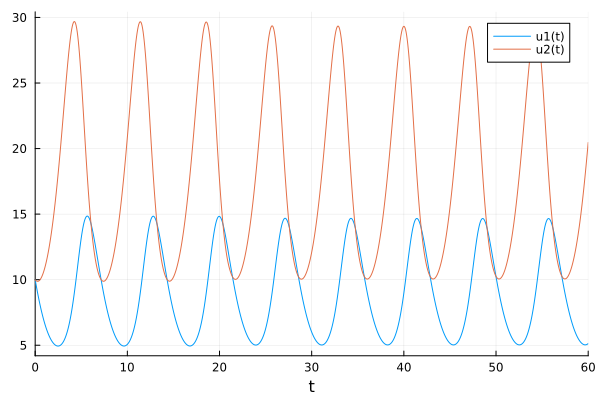

In [63]:
xy0 = [x0, y0]
tspan = (t0, tn)
prob = ODEProblem(PredPrey, xy0, tspan)
sol = solve(prob, Tsit5())
plot(sol)